In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
performance = pd.read_csv('../datasets/students_performance/Student_Performance.csv').dropna(how='all')
performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
performance.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
performance.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 893.6 KB


In [5]:
y = performance['Performance Index']
x = performance.drop('Performance Index', axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 5), (2500, 5), (7500,), (2500,))

In [8]:
def preprocess(data):
    data = data.copy()
    
    data['Hours Studied'] = data['Hours Studied'].astype('int8')
    data['Previous Scores'] = data['Previous Scores'].astype('int8')
    data['Extracurricular Activities'] = (data['Extracurricular Activities'] == 'Yes').astype('int8')
    data['Sleep Hours'] = data['Sleep Hours'].astype('int8')
    data['Sample Question Papers Practiced'] = data['Sample Question Papers Practiced'].astype('int8')
    
    return data

In [9]:
x_train_p = preprocess(x_train)
x_train_p

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
2967,7,54,0,8,3
700,3,66,0,4,6
3481,2,96,1,9,8
1621,4,40,1,4,0
800,6,48,1,4,1
...,...,...,...,...,...
9225,5,64,1,4,3
4859,6,78,0,9,6
3264,1,76,1,6,5
9845,4,44,0,4,8


In [10]:
x_test_p = preprocess(x_test)
x_test_p

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9394,4,67,0,9,3
898,8,60,0,4,7
2398,6,90,0,5,6
5906,1,51,1,6,6
2343,2,90,0,5,9
...,...,...,...,...,...
8764,7,40,0,8,8
4359,4,42,1,5,7
2041,8,50,0,8,7
1108,7,73,1,9,5


In [11]:
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
pipeline.fit(x_train_p, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('polynomialfeatures', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [12]:
def regression_report(y_true, y_pred):
    print(f"Min y:         {y_true.min():.2f}")
    print(f"Max y:         {y_true.max():.2f}")
    print(f"Mean y:        {y_true.mean():.2f}")
    print(f"Std deviation: {y_true.std():.2f}")
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print()
    print(f"Mean Squared Error (MSE):       {mse:.3f}")
    print(f"Mean Absolute Error (MAE):      {mae:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R^2 Score:                      {r2:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [13]:
def regression_plots(y_true, y_pred):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        'r--', lw=2, label='Ideal'
    )
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Actual Values')
    plt.legend()

    plt.subplot(1, 2, 2)
    errors = y_true - y_pred
    plt.hist(errors, bins=30, edgecolor='black')
    plt.xlabel('Error (Actual - Prediction)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Errors')
    plt.tight_layout()
    plt.show()

In [14]:
y_predicted_train = pipeline.predict(x_train_p)
np.round(y_predicted_train, decimals=1)

array([45.2, 44.9, 76. , ..., 50.7, 25.6, 78.1], shape=(7500,))

In [15]:
np.array(y_train)

array([41., 45., 75., ..., 54., 27., 76.], shape=(7500,))

In [16]:
regression_report(y_train, y_predicted_train)

Min y:         10.00
Max y:         100.00
Mean y:        55.25
Std deviation: 19.34

Mean Squared Error (MSE):       4.162
Mean Absolute Error (MAE):      1.617
Root Mean Squared Error (RMSE): 2.040
R^2 Score:                      0.989
Mean Absolute Percentage Error (MAPE): 3.46%


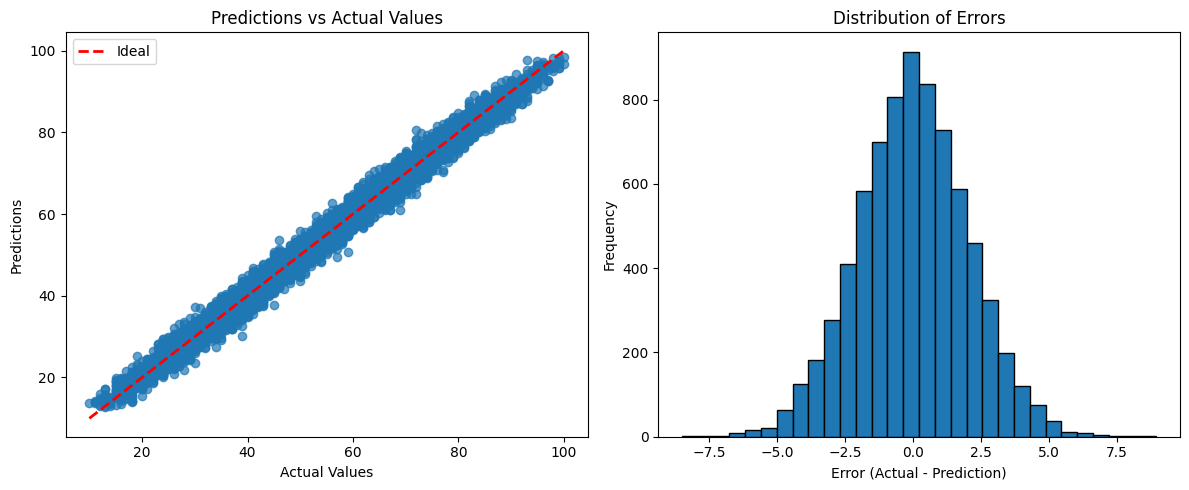

In [17]:
regression_plots(y_train, y_predicted_train)

In [18]:
y_predicted = pipeline.predict(x_test_p)
np.round(y_predicted, decimals=1)

array([50.5, 53.1, 78.1, ..., 44.8, 66.3, 83.7], shape=(2500,))

In [19]:
np.array(y_test)

array([53., 50., 80., ..., 46., 66., 84.], shape=(2500,))

In [20]:
regression_report(y_test, y_predicted)

Min y:         11.00
Max y:         100.00
Mean y:        55.16
Std deviation: 18.82

Mean Squared Error (MSE):       4.110
Mean Absolute Error (MAE):      1.617
Root Mean Squared Error (RMSE): 2.027
R^2 Score:                      0.988
Mean Absolute Percentage Error (MAPE): 3.43%


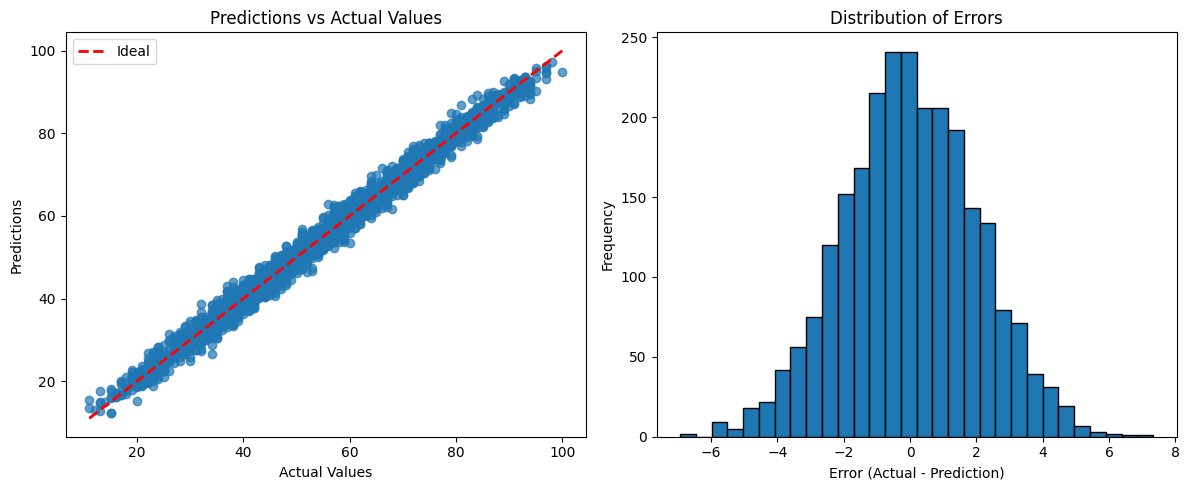

In [21]:
regression_plots(y_test, y_predicted)

In [25]:
scaler_ridge = StandardScaler()

In [26]:
x_train_sc = scaler_ridge.fit_transform(x_train_p)
x_train_sc

array([[ 0.77878881, -0.89023815, -0.99813507,  0.86008902, -0.55156609],
       [-0.76255333, -0.20093851, -0.99813507, -1.49588893,  0.49324255],
       [-1.14788887,  1.52231061,  1.00186841,  1.4490835 ,  1.18978165],
       ...,
       [-1.5332244 ,  0.37347787,  1.00186841, -0.31789996,  0.144973  ],
       [-0.3772178 , -1.46465452, -0.99813507, -1.49588893,  1.18978165],
       [ 1.16412434,  0.77556932,  1.00186841,  0.86008902, -1.24810519]],
      shape=(7500, 5))

In [27]:
x_test_sc = scaler_ridge.transform(x_test_p)
x_test_sc

array([[-0.3772178 , -0.14349687, -0.99813507,  1.4490835 , -0.55156609],
       [ 1.16412434, -0.54558833, -0.99813507, -1.49588893,  0.8415121 ],
       [ 0.39345327,  1.17766078, -0.99813507, -0.90689444,  0.49324255],
       ...,
       [ 1.16412434, -1.1200047 , -0.99813507,  0.86008902,  0.8415121 ],
       [ 0.77878881,  0.20115295,  1.00186841,  1.4490835 ,  0.144973  ],
       [ 0.39345327,  1.34998569,  1.00186841,  1.4490835 ,  0.144973  ]],
      shape=(2500, 5))

In [28]:
model_ridge = Ridge()
model_ridge.fit(x_train_sc, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [29]:
ridge_train_predicted = model_ridge.predict(x_train_sc)
np.round(ridge_train_predicted, decimals=1)

array([45.3, 44.8, 75.9, ..., 50.7, 25.6, 78. ], shape=(7500,))

In [30]:
np.array(y_train)

array([41., 45., 75., ..., 54., 27., 76.], shape=(7500,))

In [31]:
regression_report(y_train, ridge_train_predicted)

Min y:         10.00
Max y:         100.00
Mean y:        55.25
Std deviation: 19.34

Mean Squared Error (MSE):       4.175
Mean Absolute Error (MAE):      1.620
Root Mean Squared Error (RMSE): 2.043
R^2 Score:                      0.989
Mean Absolute Percentage Error (MAPE): 3.47%


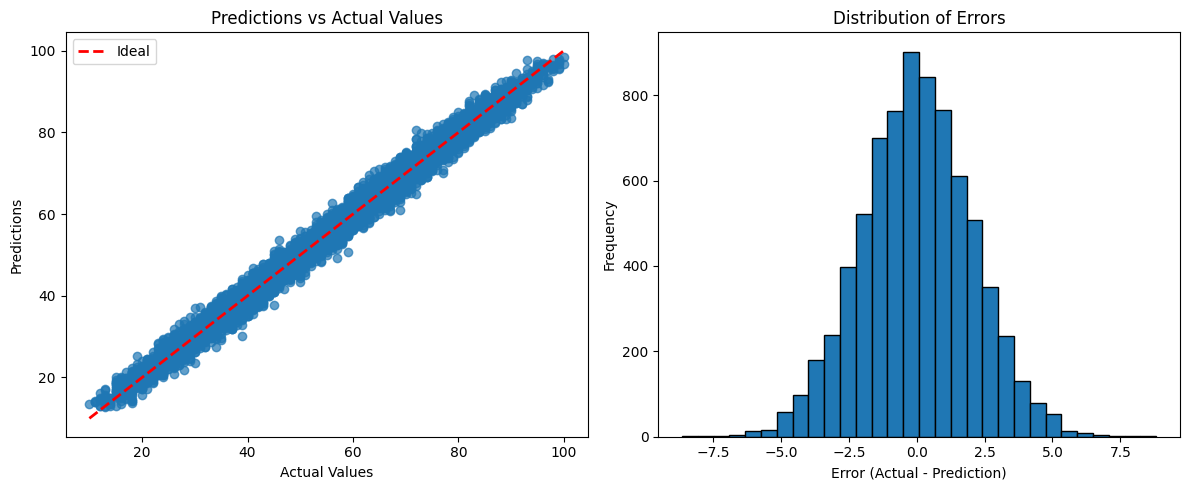

In [32]:
regression_plots(y_train, ridge_train_predicted)

In [33]:
ridge_predicted = model_ridge.predict(x_test_sc)
np.round(ridge_predicted, decimals=1)

array([50.5, 53.1, 78.3, ..., 44.8, 66.2, 83.7], shape=(2500,))

In [34]:
np.array(y_test)

array([53., 50., 80., ..., 46., 66., 84.], shape=(2500,))

In [35]:
regression_report(y_test, ridge_predicted)

Min y:         11.00
Max y:         100.00
Mean y:        55.16
Std deviation: 18.82

Mean Squared Error (MSE):       4.083
Mean Absolute Error (MAE):      1.610
Root Mean Squared Error (RMSE): 2.021
R^2 Score:                      0.988
Mean Absolute Percentage Error (MAPE): 3.42%


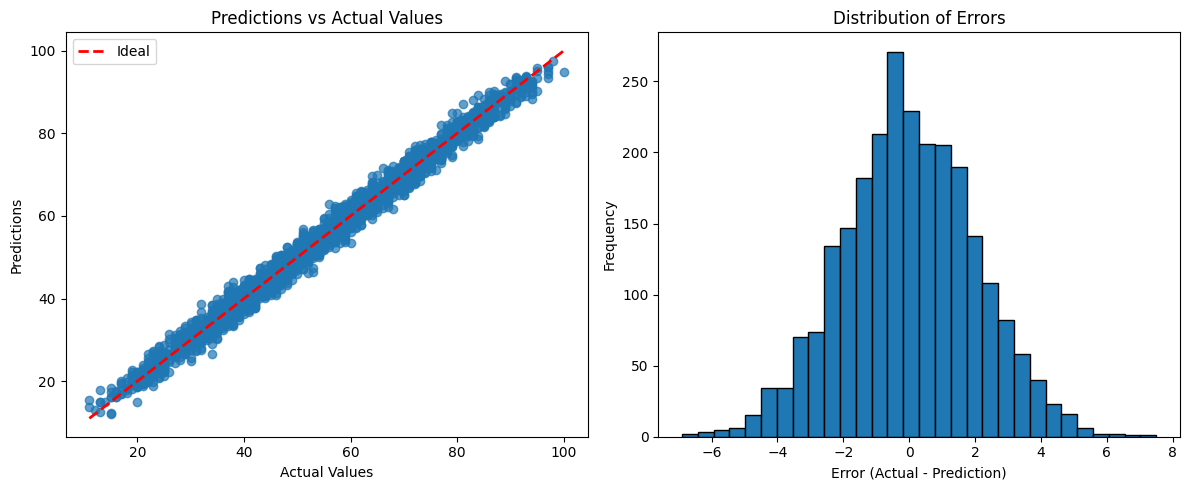

In [36]:
regression_plots(y_test, ridge_predicted)

In [37]:
model_linear = LinearRegression()
model_linear.fit(x_train_sc, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
linear_train_predicted = model_linear.predict(x_train_sc)
np.round(linear_train_predicted, decimals=1)

array([45.3, 44.8, 75.9, ..., 50.7, 25.6, 78. ], shape=(7500,))

In [39]:
np.array(y_train)

array([41., 45., 75., ..., 54., 27., 76.], shape=(7500,))

In [40]:
regression_report(y_train, linear_train_predicted)

Min y:         10.00
Max y:         100.00
Mean y:        55.25
Std deviation: 19.34

Mean Squared Error (MSE):       4.175
Mean Absolute Error (MAE):      1.620
Root Mean Squared Error (RMSE): 2.043
R^2 Score:                      0.989
Mean Absolute Percentage Error (MAPE): 3.47%


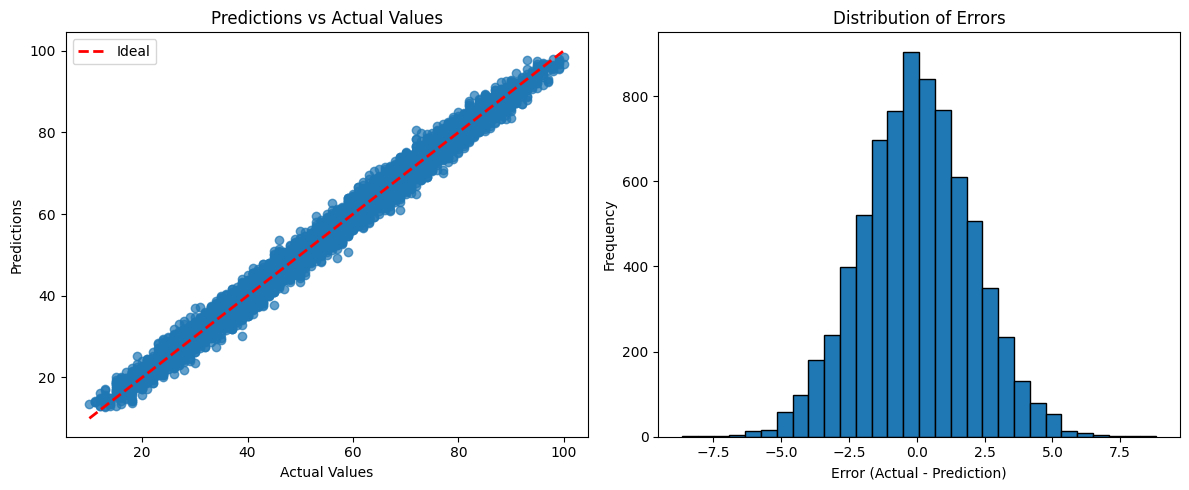

In [41]:
regression_plots(y_train, linear_train_predicted)

In [42]:
linear_predicted = model_linear.predict(x_test_sc)
np.round(linear_predicted, decimals=1)

array([50.5, 53.1, 78.3, ..., 44.8, 66.2, 83.7], shape=(2500,))

In [43]:
np.array(y_test)

array([53., 50., 80., ..., 46., 66., 84.], shape=(2500,))

In [44]:
regression_report(y_test, linear_predicted)

Min y:         11.00
Max y:         100.00
Mean y:        55.16
Std deviation: 18.82

Mean Squared Error (MSE):       4.083
Mean Absolute Error (MAE):      1.610
Root Mean Squared Error (RMSE): 2.021
R^2 Score:                      0.988
Mean Absolute Percentage Error (MAPE): 3.42%


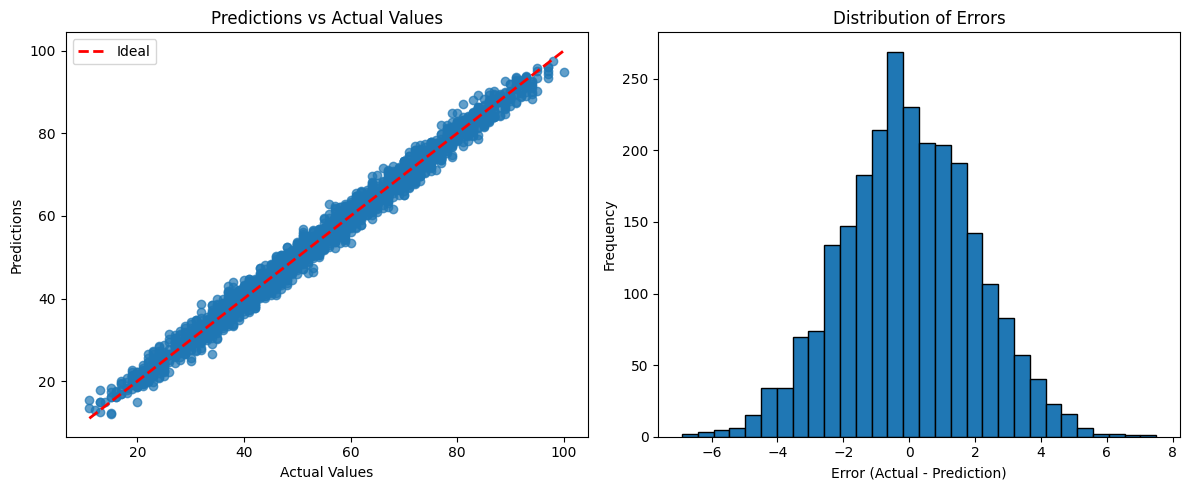

In [45]:
regression_plots(y_test, linear_predicted)

In [46]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train_sc, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [47]:
knn_train_predicted = knn_regressor.predict(x_train_sc)
np.round(knn_train_predicted, decimals=1)

array([45. , 44. , 74.8, ..., 50.2, 26.4, 81.2], shape=(7500,))

In [48]:
np.array(y_train)

array([41., 45., 75., ..., 54., 27., 76.], shape=(7500,))

In [49]:
regression_report(y_train, knn_train_predicted)

Min y:         10.00
Max y:         100.00
Mean y:        55.25
Std deviation: 19.34

Mean Squared Error (MSE):       6.077
Mean Absolute Error (MAE):      1.969
Root Mean Squared Error (RMSE): 2.465
R^2 Score:                      0.984
Mean Absolute Percentage Error (MAPE): 4.28%


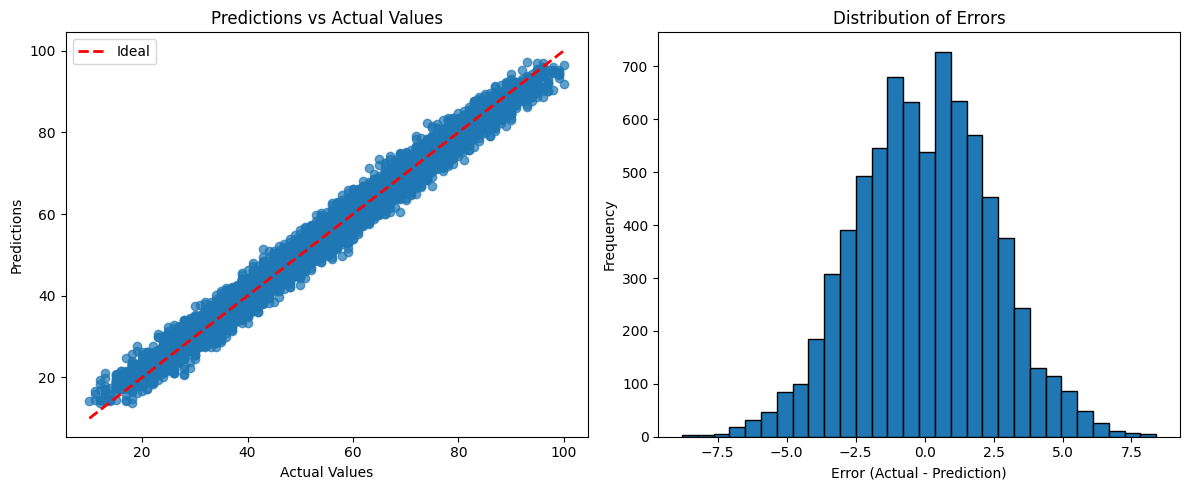

In [50]:
regression_plots(y_train, knn_train_predicted)

In [51]:
knn_predicted = model_linear.predict(x_test_sc)
np.round(knn_predicted, decimals=1)

array([50.5, 53.1, 78.3, ..., 44.8, 66.2, 83.7], shape=(2500,))

In [52]:
np.array(y_test)

array([53., 50., 80., ..., 46., 66., 84.], shape=(2500,))

In [53]:
regression_report(y_test, knn_predicted)

Min y:         11.00
Max y:         100.00
Mean y:        55.16
Std deviation: 18.82

Mean Squared Error (MSE):       4.083
Mean Absolute Error (MAE):      1.610
Root Mean Squared Error (RMSE): 2.021
R^2 Score:                      0.988
Mean Absolute Percentage Error (MAPE): 3.42%


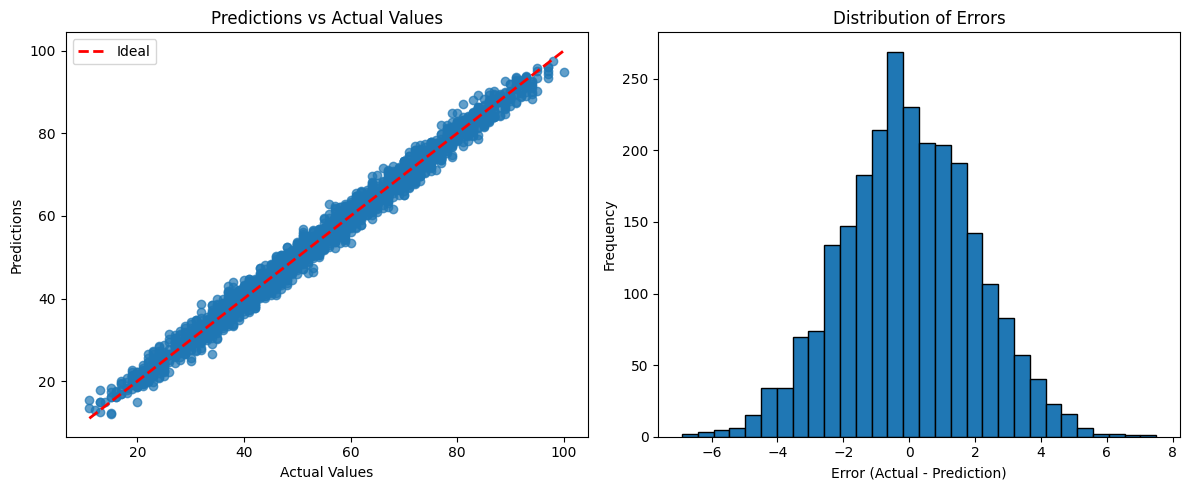

In [54]:
regression_plots(y_test, knn_predicted)